# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Appalling service with fai...
1,✅ Trip Verified | British Airways charge you f...
2,✅ Trip Verified | What is wrong with you guys?...
3,✅ Trip Verified | We booked two business cla...
4,✅ Trip Verified | I’ve flown with many airline...


In [4]:
df.to_csv("C:\\Users\\me\\OneDrive\\Bureau\\Britich_airways_FORAGE\\data\\df.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

##### Lemmatization/Stemming & Remove stopwords

In [10]:
# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')  # WordNet language data for lemmatization
nltk.download('stopwords')# Download stopwords from NLTK

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\me\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\me\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\me\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
df = pd.read_csv("C:\\Users\\me\\OneDrive\\Bureau\\Britich_airways_FORAGE\\data\\df.csv")

In [16]:
# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    stopwords = 'english'
    # Remove "✅ Trip Verified"
    text = re.sub(r'✅ Trip Verified', '', text)
    # Remove any other unnecessary text or symbols if needed
    text = re.sub(r'UNWANTED_TEXT', '', text)
     # Tokenize and lemmatize
    words = text.split()  # Splits text into words
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stopwords]# Lemmatization
    return " ".join(words)  # Remove leading and trailing whitespaces
# Apply cleaning and lemmatization to 'review_text' column
df['reviews'] = df['reviews'].apply(clean_text)

# Check the results
print(df['reviews'].head())
print(df.columns)

0    | appalling service with failing defective fle...
1    | british airway charge you for the pleasure o...
2    | what wrong with you guys? people pay lot of ...
3    | we booked two business class seat with briti...
4    | i’ve flown with many airlines, but my recent...
Name: reviews, dtype: object
Index(['Unnamed: 0', 'reviews'], dtype='object')


##### **1. Topic Modeling:** can help uncover common themes or topics discussed in the reviews **-CountVectorizer** converts the text data into a matrix of token counts. It takes all the words from the reviews, builds a vocabulary of terms (after applying filters like max_df and min_df), and then counts how many times each word appears in each review.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the cleaned reviews into a# matrix of token counts
count_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english') # exclude 90% of words appeared in too many reviews and exclude 20% of rare words in the reviews 
count_data = count_vectorizer.fit_transform(df['reviews'])

In [19]:
print(count_data)

  (0, 316)	1
  (0, 3067)	1
  (0, 1388)	1
  (0, 1464)	1
  (0, 144)	1
  (0, 238)	1
  (0, 1476)	1
  (0, 3474)	2
  (0, 2943)	1
  (0, 2903)	2
  (0, 3124)	1
  (0, 1009)	1
  (0, 65)	1
  (0, 1748)	3
  (0, 523)	1
  (0, 15)	1
  (0, 2349)	1
  (0, 1469)	1
  (0, 620)	1
  (0, 3428)	1
  (0, 2750)	1
  (0, 960)	1
  (0, 444)	1
  (0, 433)	1
  (0, 2132)	1
  :	:
  (999, 1683)	1
  (999, 2033)	1
  (999, 1465)	1
  (999, 2088)	2
  (999, 2973)	1
  (999, 1559)	1
  (999, 2278)	1
  (999, 446)	1
  (999, 1360)	1
  (999, 1174)	1
  (999, 2135)	1
  (999, 1549)	1
  (999, 3054)	2
  (999, 2320)	1
  (999, 628)	2
  (999, 3406)	1
  (999, 3262)	1
  (999, 374)	1
  (999, 2863)	1
  (999, 3111)	1
  (999, 1449)	1
  (999, 3082)	1
  (999, 2314)	1
  (999, 3823)	1
  (999, 3017)	1


In [20]:
# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42) # n_components=5: number of topics and random_state=42 : for not chnaging the output everytime i run 
lda.fit(count_data)
# Display the topics
words = count_vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([words[i] for i in topic.argsort()[-10:]])

Topic 0:
['cabin', 'service', 'food', 'economy', 'flight', 'ba', 'business', 'class', 'seat', 'wa']
Topic 1:
['day', 'told', 'time', 'british', 'customer', 'hour', 'service', 'ba', 'flight', 'wa']
Topic 2:
['ticket', 'day', 'airport', 'delayed', 'hour', 'luggage', 'london', 'ba', 'wa', 'flight']
Topic 3:
['day', 'staff', 'wa', 'time', 'voucher', 'hour', 'airline', 'london', 'ba', 'flight']
Topic 4:
['club', 'cabin', 'food', 'service', 'time', 'crew', 'good', 'ba', 'flight', 'wa']


##### 2. setiment analysis using VADER: categorize reviews as positive, negative, or neutral, providing an overall sense of customer feedback

In [21]:
# Import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(review):
    # Check if review is a string, if not return 0 (neutral sentiment)
    if isinstance(review, str):# to check the ooject is string or not
        sentiment = sia.polarity_scores(review)
        return sentiment['compound']
    else:
        return 0  # Neutral sentiment for non-string reviews

# Convert all reviews to string to avoid float issues
df['reviews'] = df['reviews'].astype(str)

# Apply sentiment analysis
df['sentiment'] = df['reviews'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

##### view sentiment categories

In [23]:
print(df['sentiment_label'].value_counts())

sentiment_label
negative    502
positive    493
neutral       5
Name: count, dtype: int64


##### 3. Word Cloud Visualization 

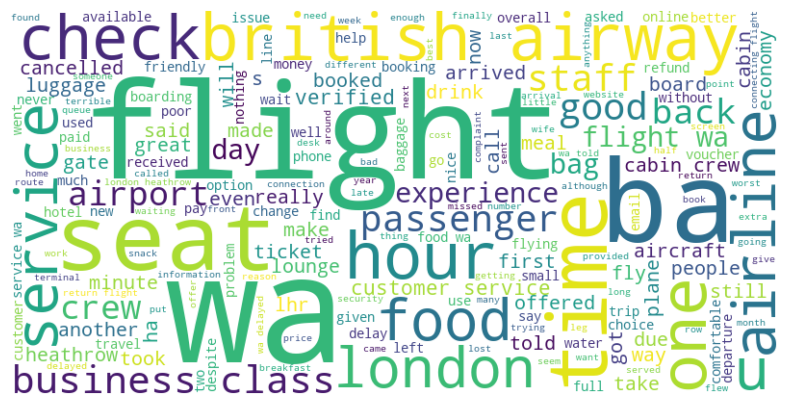

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one string
text = " ".join(review for review in df['reviews'])
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')#interpolation='bilinear':ensuring that the words in the word cloud are rendered smoothly
plt.axis('off')
plt.show()